# Part I (35% of the mark)
Let us consider the search space below, where S is the start node, and both G1 and G2 satisfy 
the goal test. Arcs are labelled with the actual cost of traversing them and the estimated cost to 
a goal state is reported inside the nodes. For example, the true cost of going from the node S to 
the node A is equal to 8. The estimation of going from the node A to a goal is equal to 4.
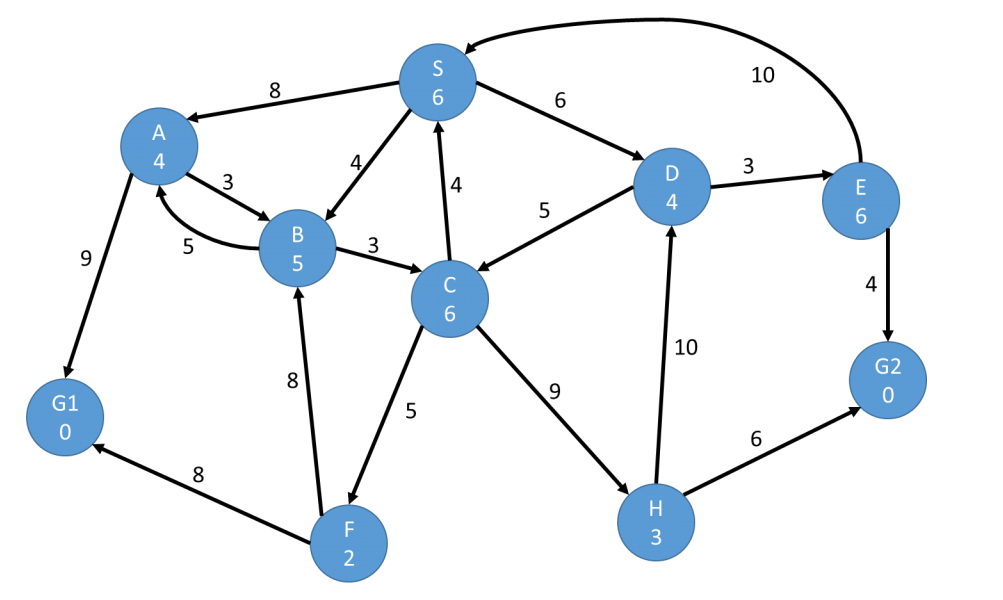

## Question 1
Apply the following search strategies to this problem:

• Depth-first search (4%)
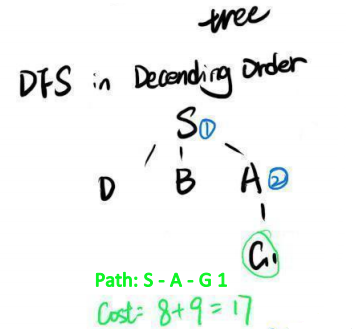

• Breadth-first search (4%)
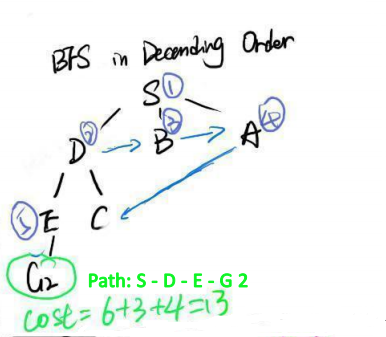

• Uniform cost search (6%)
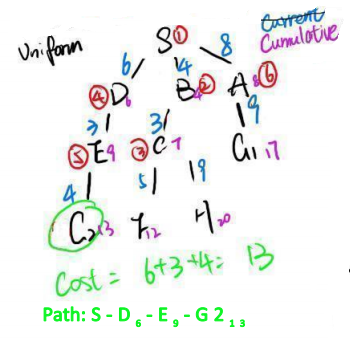

• Best-first search (6%)
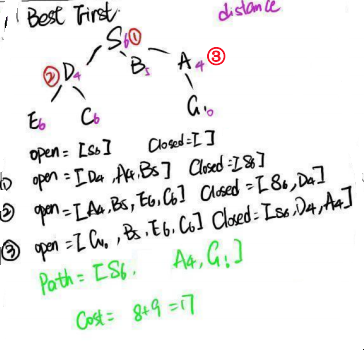

• Algorithm A (10%)
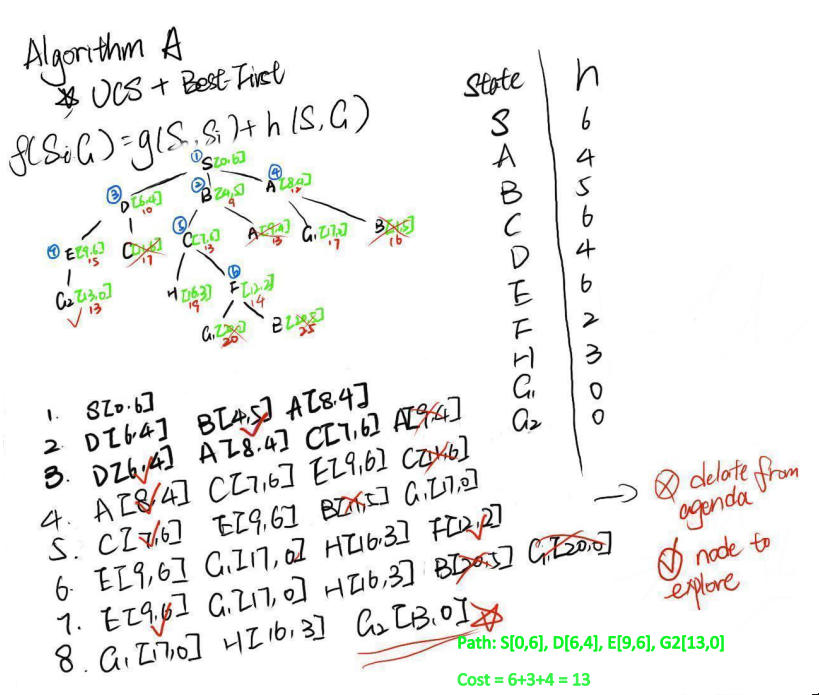

## Question 2 
Check each value shown on the graph and make a table showing the heuristic value versus the 
true length of the optimal path to the nearest goal. Are the heuristic values shown in the graph 
above admissible? Justify your answer. (5%)

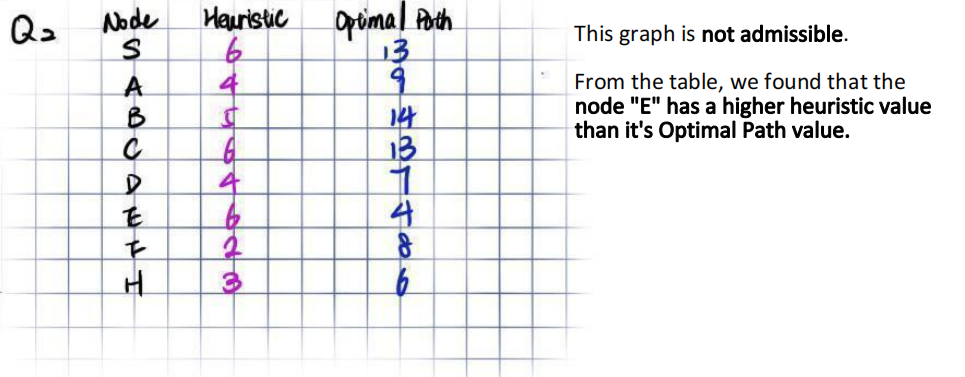

# Part II
In this part, you are going to write a Python code to enable the computer to solve the problem 
in the first part. For this reason:

## Q1: 
Choose a formalism to represent all possible states or what is known as the state 
representation; this includes the initial state and the final state (15%)

In [1]:
#state representation: initial the node with their heuristic value and distance to next node
G1 = { 'name': 'G1', 'estimate': 0, 'cost': 0, 'nextNodes': {}}
G2 = { 'name': 'G2', 'estimate': 0, 'cost': 0, 'nextNodes': {}}
S = { 'name': 'S', 'estimate': 6, 'cost': 0, 'nextNodes': {'A': 8, 'B':4, 'D':6}}
A = { 'name': 'A', 'estimate': 4, 'cost': 0, 'nextNodes': {'B': 3, 'G1':9}}
B = { 'name': 'B', 'estimate': 5, 'cost': 0, 'nextNodes': {'A': 5, 'C':3}}
C = { 'name': 'C', 'estimate': 6, 'cost': 0, 'nextNodes': {'F': 5, 'H':9, 'S':4}}
D = { 'name': 'D', 'estimate': 4, 'cost': 0, 'nextNodes': {'C': 5, 'E':3}}
E = { 'name': 'E', 'estimate': 6, 'cost': 0, 'nextNodes': {'G2': 4, 'S':10}}
F = { 'name': 'F', 'estimate': 2, 'cost': 0, 'nextNodes': {'B': 5, 'G1':8}}
H = { 'name': 'H', 'estimate': 3, 'cost': 0, 'nextNodes': {'D': 10, 'G2':6}}
TotleNodes = [G1, G2, S, A, B, C, D, E, F, H]
#show the initial and final state
initialNode = S
finalNodes = [G1, G2]

## Q2: 
Define the list of possible actions at each time, and define the function that will check 
whether or not a state / action is valid or not (10%)

In [2]:
#define a method which represent the possible actions
def printState(currentNode):
    state = []
#    Acdending is: for nodes in (currentNode['nextNodes']):
#for decending, it's "reversed"
    for nodes in reversed(currentNode['nextNodes']):
        state.append(nodes)
    return state
printState(initialNode)

['D', 'B', 'A']

In [3]:
def is_valid_action(currentNode):
    # check action is valid
    return len(currentNode['nextNodes']) > 0

def is_final(node):
    #check if reached either goal
    return node in finalNodes

def get_node_by_name(nodeName):
    for node in TotleNodes:
        if node['name'] == nodeName:
            return node
    print("can't find node by name")
    return None

def get_cost(currentNode, targetNode):
    cost = -1
    for k,v in currentNode['nextNodes'].items():
        if targetNode['name']== k:
            cost = v
    return cost 

In [4]:
is_valid_action(B)

True

In [5]:
is_final(G2)

True

## Q3:
Implement the algorithm Depth-First-Search allowing the agent to move from the initial 
state to the final state. Remember, while exploring, use a descending alphabetical order 
to add new nodes to the agenda. Don’t forget to display the path once the destination / 
goal is reached (10%)

In [6]:
def DFS(currentNode, stateList = None, path = None):
    #Init
    if stateList is None:
        stateList = printState(currentNode)
    if path is None:
        path = []
        path.append(currentNode['name'])
        currentNode['cost'] = 0
    #display the path once the destination / goal is reached   
    if is_final(currentNode) or not is_valid_action(currentNode):
        return path, currentNode['cost']
    
#     print(stateList)
    #start moving
    targetNodeName = stateList.pop()    
    targetNode = get_node_by_name(targetNodeName)   
    stepCost = get_cost(currentNode, targetNode)
    targetNode['cost'] = currentNode['cost'] + stepCost
    for nodeName in printState(targetNode):
        if nodeName not in stateList and nodeName not in path: 
            stateList.append(nodeName) 
    currentNode = targetNode
    path.append(currentNode['name']) 
    result, totalcost = DFS(currentNode, stateList, path)
    if result:
        return result, totalcost
    path = None
    return None, -1

In [7]:
#dispaly the path
DFS(initialNode)

(['S', 'A', 'G1'], 17)

## Q4: 
Implement the algorithm A for this problem. Don’t forget to display the path once the destination / goal is reached (25%)

In [19]:
import math
from collections import OrderedDict

def AStar(currentNode, stateList = None, pickList = None):
    # Init data
    f = math.inf
    if stateList is None:
        stateList = []
        currentNode['cost'] = 0
        stateList.append(currentNode['name'])
    if pickList is None:
        pickList = []
        
    print(stateList)     
    if is_final(currentNode):
        return pickList
#     while (currentNode in TotleNodes and not is_final(currentNode)):
    #Start Moving
    for nodeName in stateList:
        node = get_node_by_name(nodeName)
        g = node['cost']
        h = node['estimate']
        if g + h < f:
            f = g + h
            currentNode = node
    stateList.remove(currentNode['name'])
    pickList.append(currentNode['name'])
    
    for nextNodeName, stepCost in currentNode['nextNodes'].items():           
            nextNode = get_node_by_name(nextNodeName)
            # compare the same node current & old
            if nextNodeName not in pickList and nextNodeName not in stateList or nextNode['cost'] > (currentNode['cost'] + stepCost):
                nextNode['cost'] = currentNode['cost'] + stepCost
                #find path
                nextNode['lastNodeName'] = currentNode['name']
                stateList.append(nextNode['name'])
                
    result = AStar(currentNode, stateList, pickList)
    #get path
    if result:
        paths = []
        goal = get_node_by_name(pickList[-1])
        cost = goal['cost']

        def find_path(nodeName):
            if nodeName:
                paths.insert(0, nodeName)
                node = get_node_by_name(nodeName)
            if 'lastNodeName'in node and node['lastNodeName'] :
                lastNode = get_node_by_name(node['lastNodeName'])
                find_path(lastNode['name'])
        find_path(pickList[-1])
        
    return pickList, paths, cost

In [20]:
AStar(initialNode)

['S']
['A', 'B', 'D']
['A', 'D', 'C']
['A', 'C', 'E']
['C', 'E', 'G1']
['E', 'G1', 'F', 'H']
['E', 'G1', 'H']
['G1', 'H', 'G2']
['G1', 'H']


(['S', 'B', 'D', 'A', 'C', 'F', 'E', 'G2'], ['S', 'D', 'E', 'G2'], 13)

## Q5 
Compare the two solutions in (3) and (4) and analyse the results based on two criteria: Speed and efficiency (5%)

DFS is faster than A, found G1 with cost 17 for distance. Memory used 33 functions.
A is slower,, found G2 with cost 13 for distance. Memory used 379 functions.

###Speed : 

DFS > A



###Efficiency : 


Distance efficiency : A > DFS


Memory efficiency : DFS >A

In [11]:
import cProfile
cProfile.run('DFS(initialNode)')

         33 function calls (31 primitive calls) in 0.000 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        3    0.000    0.000    0.000    0.000 1312934297.py:2(printState)
      3/1    0.000    0.000    0.000    0.000 1822282684.py:1(DFS)
        2    0.000    0.000    0.000    0.000 933992404.py:1(is_valid_action)
        2    0.000    0.000    0.000    0.000 933992404.py:16(get_cost)
        3    0.000    0.000    0.000    0.000 933992404.py:5(is_final)
        2    0.000    0.000    0.000    0.000 933992404.py:9(get_node_by_name)
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.exec}
        2    0.000    0.000    0.000    0.000 {built-in method builtins.len}
        9    0.000    0.000    0.000    0.000 {method 'append' of 'list' objects}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' o

In [12]:
import cProfile
cProfile.run('AStar(initialNode)')

['S']
['A', 'B', 'D']
['A', 'D', 'C']
['A', 'C', 'E']
['C', 'E', 'G1']
['E', 'G1', 'F', 'H']
['E', 'G1', 'H']
['G1', 'H', 'G2']
['G1', 'H']
         379 function calls (347 primitive calls) in 0.000 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      9/1    0.000    0.000    0.000    0.000 3055460223.py:4(AStar)
     32/8    0.000    0.000    0.000    0.000 3055460223.py:44(find_path)
        9    0.000    0.000    0.000    0.000 933992404.py:5(is_final)
       99    0.000    0.000    0.000    0.000 933992404.py:9(get_node_by_name)
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 iostream.py:202(schedule)
       18    0.000    0.000    0.000    0.000 iostream.py:437(_is_master_process)
       18    0.000    0.000    0.000    0.000 iostream.py:456(_schedule_flush)
       18    0.000    0.000    0.000    0.000 iostream.py:526(write)
        1    0.000    0.000 